OBJETIVO DA ANÁLISE
   

    Identificar o grupo de pessoas que reagiu positivamente a campanha 
    Investigar se existe algum padrão nos meses de alta da campanha 

Importando bibliotecas 

In [8]:
import matplotlib. pyplot as plt
import pandas as pd
import seaborn as sns


Carregando base de dados 

In [2]:
df = pd.read_csv("bank-direct-marketing-campaigns.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#composição da tabela 
df.shape

(41188, 20)

In [ ]:
#verificando a existência de valores faltantes 
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Iniciando a vizualização com gráficos 

Irei separar os gráficos com variáveis numéricas e strings para melhor vizualização 

In [9]:
vstring = ['job', 'marital', 'education', 'default', 'housing', 'loan']
vint = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
vdata = ['month', 'day_of_week']

Gráficos para variáveis strings 

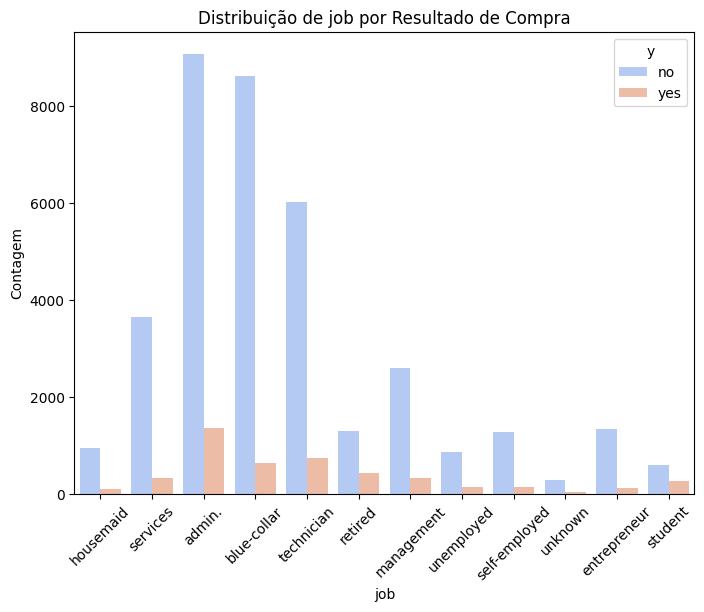

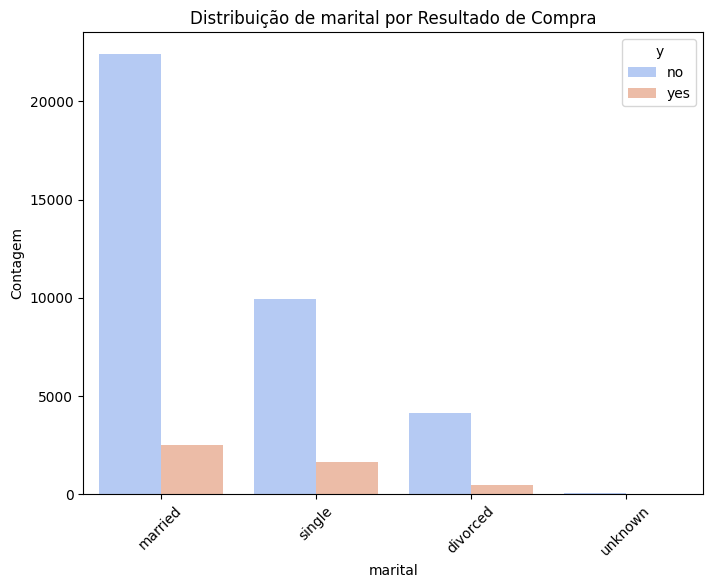

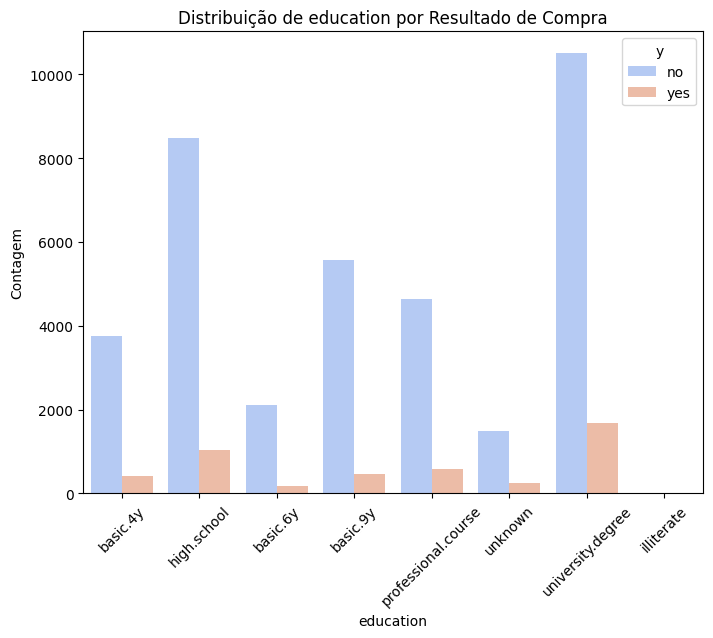

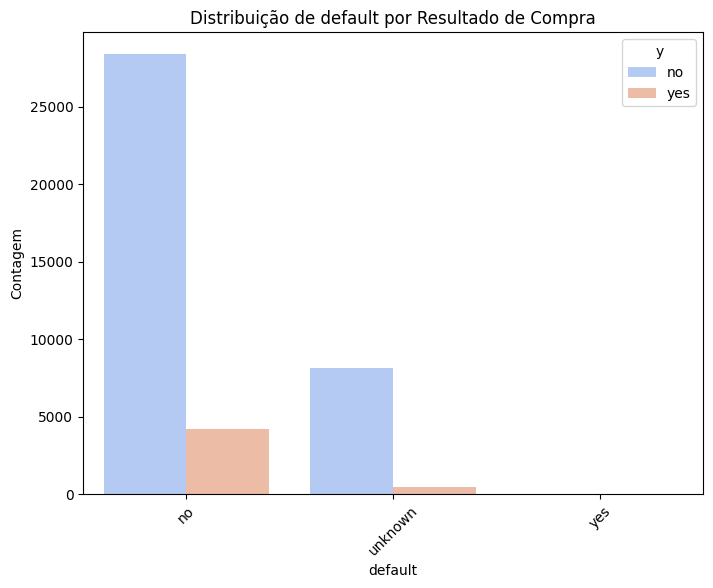

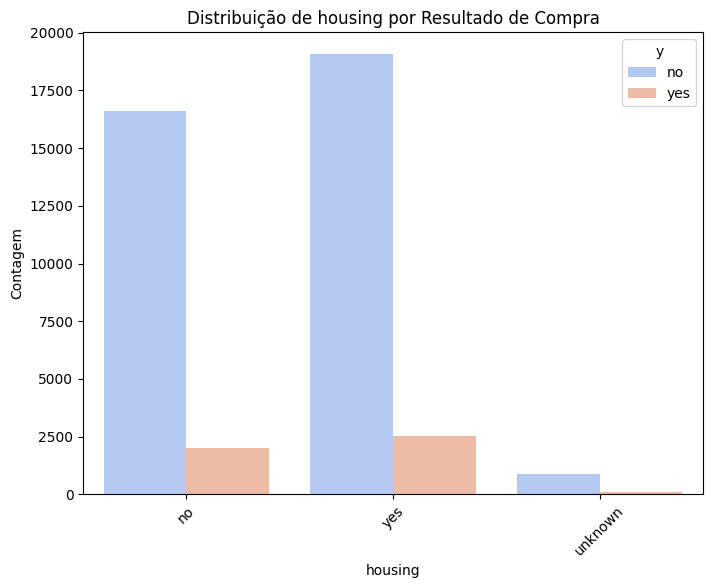

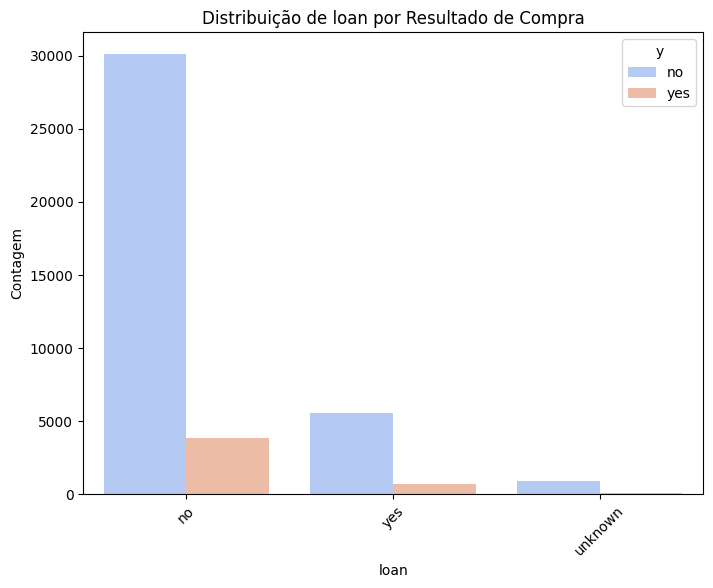

In [10]:
for var in vstring:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='y', data=df, palette='coolwarm')
    plt.title(f'Distribuição de {var} por Resultado de Compra')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

Gráficos para variáveis numéricas 

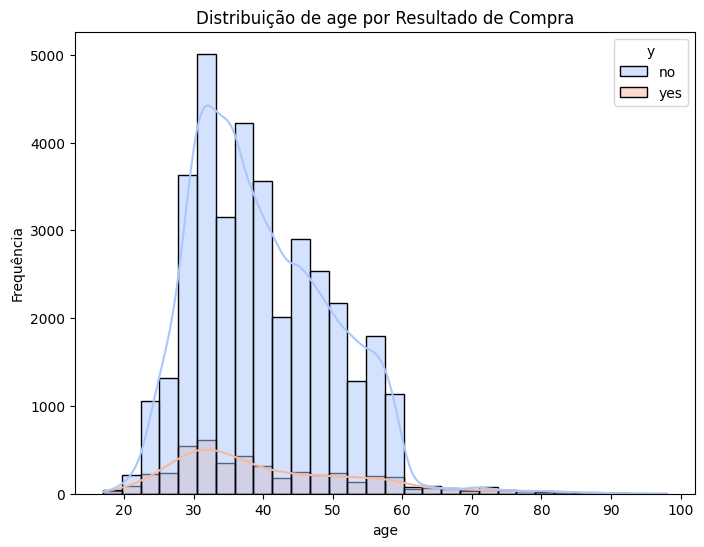

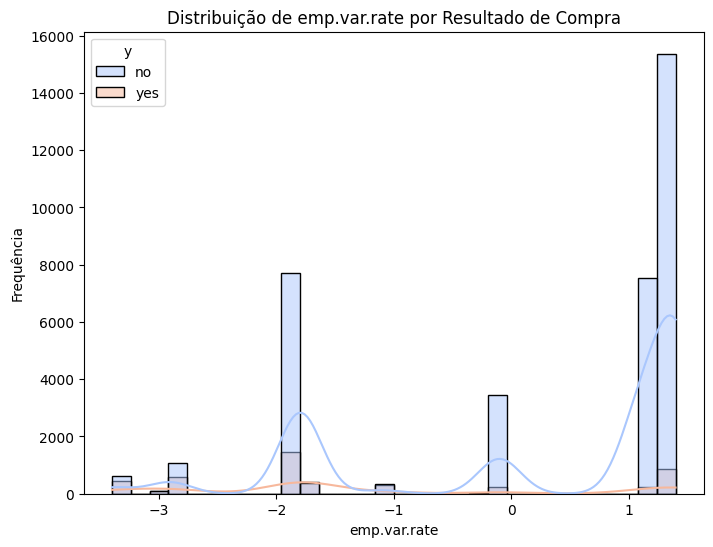

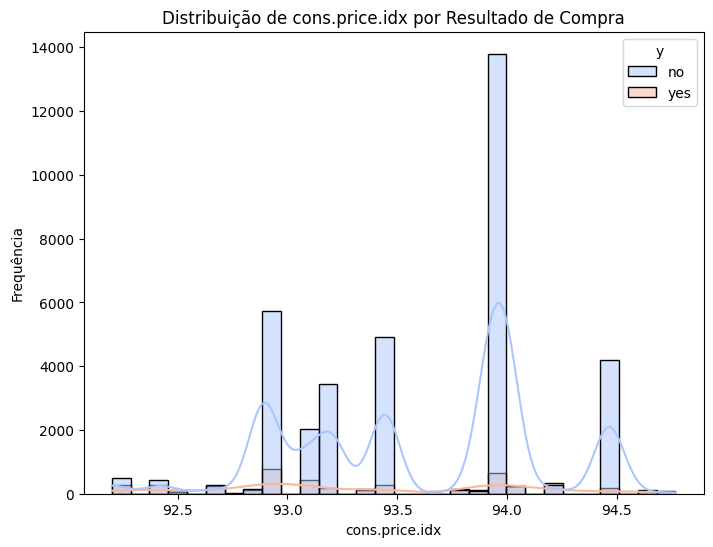

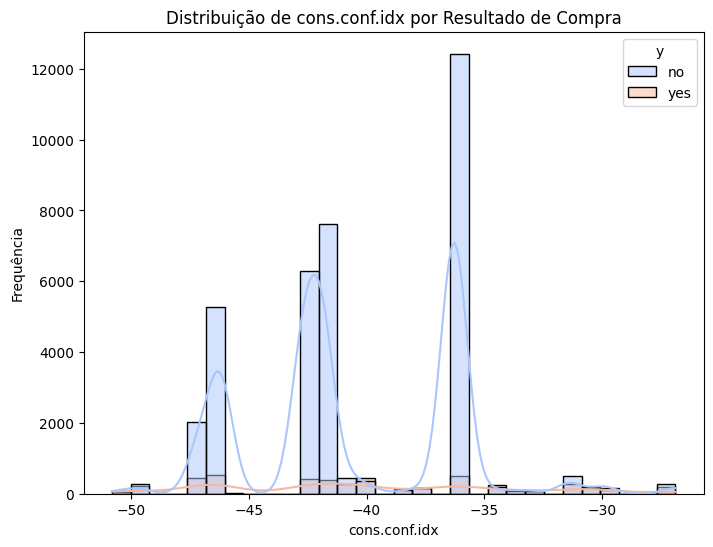

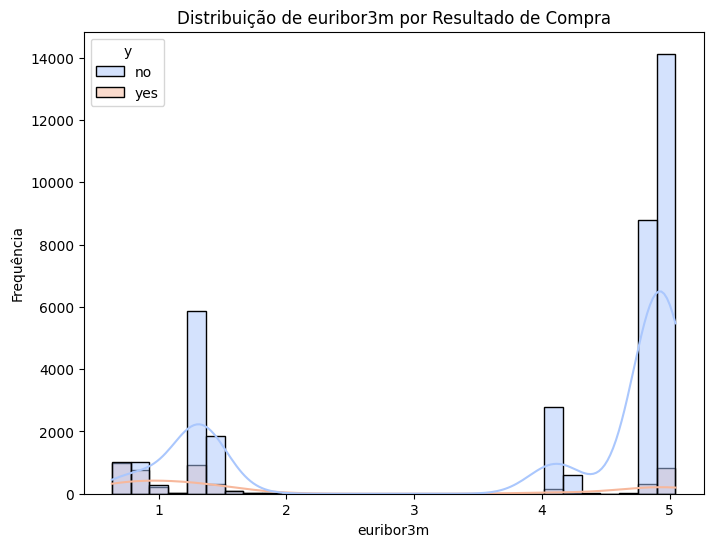

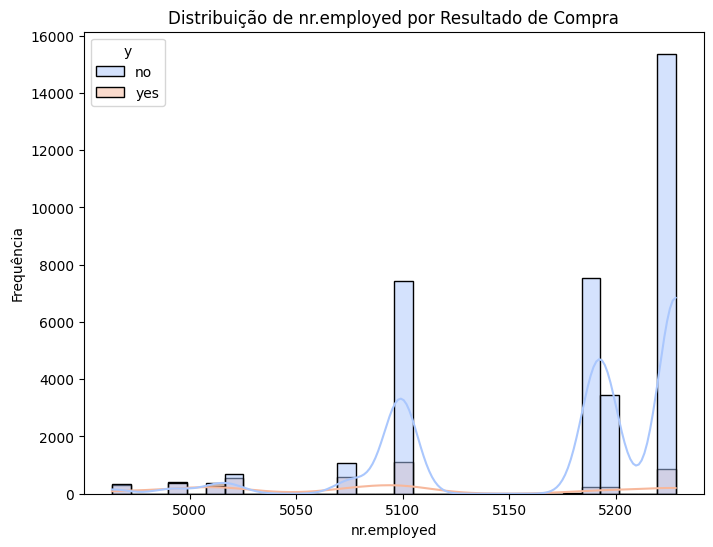

In [ ]:
df['y'] = df['y'].astype('category')
for var in vint:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, hue='y', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Distribuição de {var} por Resultado de Compra')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

Gráficos para identificar as datas de melhor desempenho 

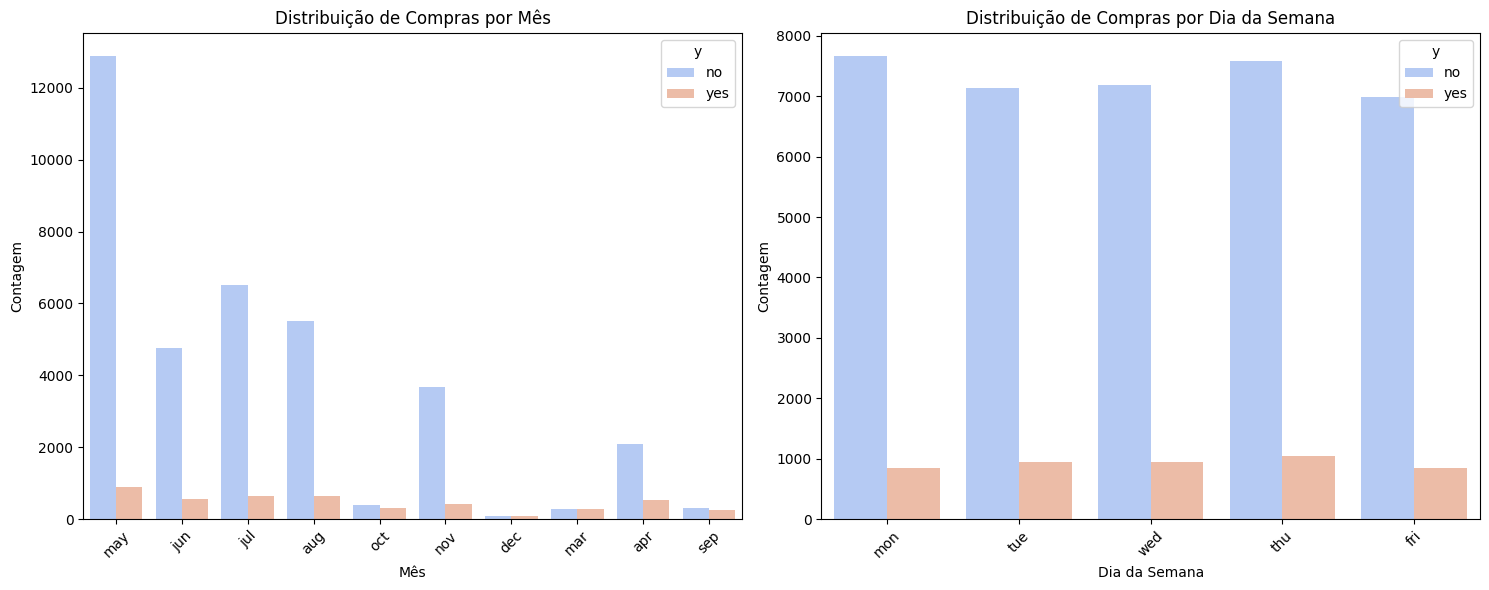

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

sns.countplot(x='month', hue='y', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Distribuição de Compras por Mês')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)  

sns.countplot(x='day_of_week', hue='y', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Distribuição de Compras por Dia da Semana')
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()